# Dossier Eidgenössische Wahlen 2019

In [506]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]

def format_csv(df, skip_index=False):
    'Reformats data for display in chart'
    rows = []
    for index, row in df.iterrows():
        for key, val in row.iteritems():
            if skip_index:
                rows.append([key,val])
            else:
                rows.append(["%s" % index,key,val])
    return rows

## Parteistärken Nationalrat

Quelle: [«Nationalratswahlen: Stärke der Parteien» (BFS)](https://www.bfs.admin.ch/bfs/de/home/statistiken/politik/wahlen/nationalratswahlen.assetdetail.217191.html)

In [502]:
VOTE_FILE = './je-d-17.02.02.03.01.xlsx'#'https://www.bfs.admin.ch/bfsstatic/dam/assets/217191/master'

In [503]:
vote_data = pd.read_excel(VOTE_FILE, skiprows=[0,1,2,4,5], skipfooter=16, index_col='Partei')
vote_data = vote_data.dropna()
vote_data = vote_data.rename(columns={'1939 2)': '1939'})
vote_data = vote_data.T
vote_data.index = vote_data.index.astype(int)
vote_data = vote_data.drop('Total', axis=1)
vote_data = vote_data.replace({'*': 0, '-> FDP': 0, '->FDP': 0, '-> Übrige': 0})
vote_data = vote_data.rename(columns={'FDP 3)': 'FDP'})
vote_data /= 100
major_parties = ["GPS", "SP", "CVP", "GLP", "FDP", "BDP", "SVP"]
vote_data_selected = vote_data[major_parties].copy()
vote_data_selected['Übrige'] = vote_data.drop(major_parties, axis=1).sum(axis=1)

In [498]:
assert pd.Series(vote_data_selected.sum(axis=1) > 0.95).all()

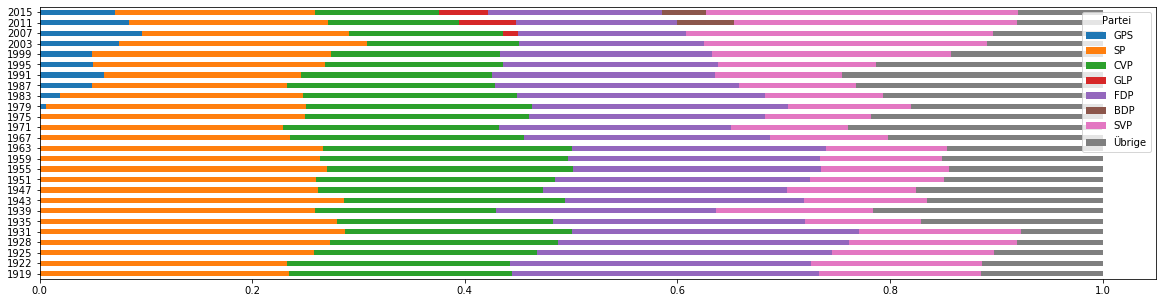

In [504]:
vote_data_selected.plot(kind='barh', stacked=True);

In [505]:
vote_data_display = pd.DataFrame(format_csv(vote_data_selected.loc[1999:]), columns=['year', 'party', 'value'])
vote_data_display.to_csv('./vote_shares_historic.csv', float_format='%.6f', index=False)

## Sitzverteilung Ständerat

Quelle: [«Ständeratswahlen: Mandatsverteilung nach Parteien» (BFS)](https://www.bfs.admin.ch/bfs/de/home/statistiken/politik/wahlen/staenderatswahlen.assetdetail.81547.html)

In [488]:
SEATS_FILE = './je-d-17.02.03.01.xlsx' # 'https://www.bfs.admin.ch/bfsstatic/dam/assets/81547/master'
seats_data = pd.read_excel(SEATS_FILE, skiprows=[0,1,2,4,5,6,7], skipfooter=14, index_col='Partei')

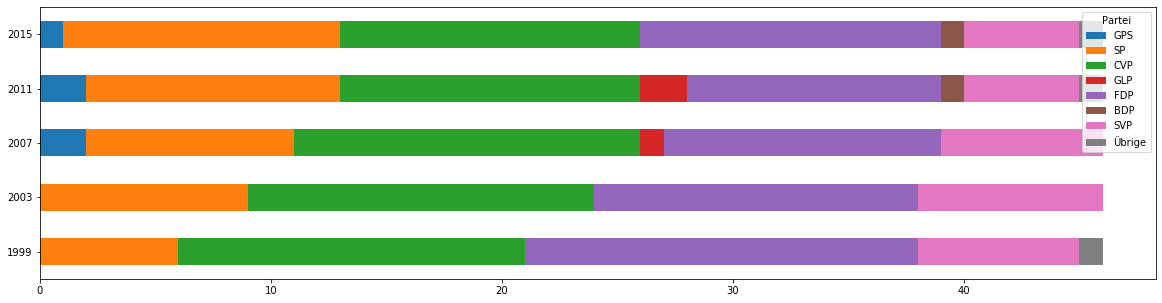

In [495]:
SEATS_FILE = './je-d-17.02.03.01.xlsx' # 'https://www.bfs.admin.ch/bfsstatic/dam/assets/81547/master'
seats_data = pd.read_excel(SEATS_FILE, skiprows=[0,1,2,4,5,6,7], skipfooter=14, index_col='Partei')
seats_data = seats_data.dropna()
seats_data = seats_data.rename(columns={'1979 1)': '1979'})
seats_data = seats_data.T
seats_data.index = seats_data.index.astype(int)
seats_data = seats_data.replace({'*': 0, '-> FDP': 0, '->FDP': 0, '-> Übrige': 0})
seats_data = seats_data.rename(columns={'FDP 2)': 'FDP'})

seats_data_selected = seats_data[major_parties].loc[1999:].copy()
seats_data_selected['Übrige'] = seats_data.drop(major_parties, axis=1).sum(axis=1)

seats_data_selected.plot(kind='barh', stacked=True);

In [490]:
assert pd.Series(seats_data_selected.sum(axis=1) == 46).all()

In [491]:
seats_data_display = pd.DataFrame(format_csv(seats_data_selected.loc[1999:]), columns=['year', 'party', 'value'])
seats_data_display.to_csv('./seats_per_party.csv', float_format='%.6f', index=False)

## Wahlbeteiligung

Quelle: [«Nationalratswahlen: Wahlbeteiligung» (BFS)](https://www.bfs.admin.ch/bfs/de/home/statistiken/politik/wahlen/nationalratswahlen/wahlbeteiligung.assetdetail.217210.html)

In [492]:
TURNOUT_FILE = './je-d-17.02.02.04.03.xlsx' #'https://www.bfs.admin.ch/bfsstatic/dam/assets/217210/master'
turnout_data = pd.read_excel(TURNOUT_FILE, skiprows=6, index_col=0, skipfooter=9, usecols=[0,1], names=['year', 'value'])

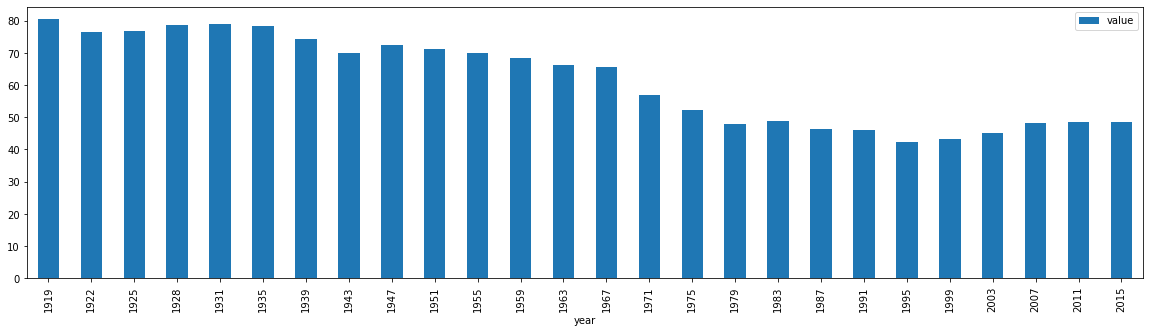

In [507]:
turnout_data_display = turnout_data
turnout_data_display.plot(kind='bar');

In [494]:
turnout_data_display.to_csv('./turnout_historic.csv', float_format='%.4f')